<a href="https://colab.research.google.com/github/Allzer/python_langyage_1_kyrs/blob/main/python_langyage_1_kyrs_1_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Установка библиотек
---



In [8]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Загрузка датасета

In [7]:
path = kagglehub.dataset_download("unsdsn/world-happiness")
df = pd.read_csv(path + "/2019.csv")

print("Первые 5 строк датасета:")
print(df.head())

Using Colab cache for faster access to the 'world-happiness' dataset.
Первые 5 строк датасета:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions 

Создание мультииндекса

In [9]:
df_multi = df.set_index(['Country or region', 'Overall rank'])
print("\nДанные с мультииндексом:")
print(df_multi.head())


Данные с мультииндексом:
                                Score  GDP per capita  Social support  \
Country or region Overall rank                                          
Finland           1             7.769           1.340           1.587   
Denmark           2             7.600           1.383           1.573   
Norway            3             7.554           1.488           1.582   
Iceland           4             7.494           1.380           1.624   
Netherlands       5             7.488           1.396           1.522   

                                Healthy life expectancy  \
Country or region Overall rank                            
Finland           1                               0.986   
Denmark           2                               0.996   
Norway            3                               1.028   
Iceland           4                               1.026   
Netherlands       5                               0.999   

                                Freedom to make 

Построение матрицы корреляций

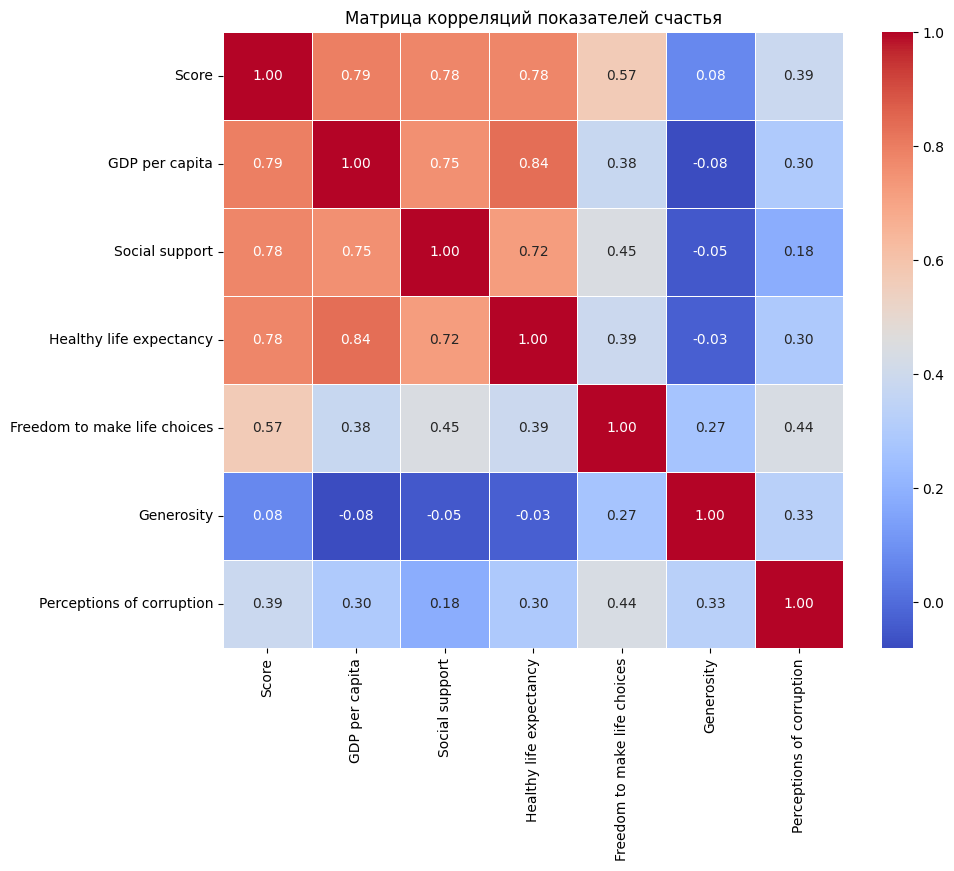

In [5]:
numeric_cols = ['Score', 'GDP per capita', 'Social support',
               'Healthy life expectancy', 'Freedom to make life choices',
               'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)
plt.title("Матрица корреляций показателей счастья")
plt.show()


Формулировка и проверка гипотезы

In [6]:
print("\nАнализ корреляций:")
hypothesis = """
Гипотеза: Показатель счастья (Score) сильно коррелирует с экономическими факторами (ВВП)
и социальной поддержкой, но слабо связан с щедростью (Generosity).
"""
print(hypothesis)

print("Результаты подтверждают гипотезу:" if
      (correlation_matrix.loc['Score', 'GDP per capita'] > 0.7 and
       correlation_matrix.loc['Score', 'Social support'] > 0.7 and
       abs(correlation_matrix.loc['Score', 'Generosity']) < 0.3)
      else "Результаты частично подтверждают гипотезу")

# Дополнительная проверка
print(f"\nКонкретные значения корреляций с Score:")
for col in numeric_cols[1:]:
    corr = correlation_matrix.loc['Score', col]
    strength = "сильная" if abs(corr) > 0.5 else "слабая"
    sign = "положительная" if corr > 0 else "отрицательная"
    print(f"{col}: {corr:.3f} ({sign} {strength} корреляция)")


Анализ корреляций:

Гипотеза: Показатель счастья (Score) сильно коррелирует с экономическими факторами (ВВП) 
и социальной поддержкой, но слабо связан с щедростью (Generosity).

Результаты подтверждают гипотезу:

Конкретные значения корреляций с Score:
GDP per capita: 0.794 (положительная сильная корреляция)
Social support: 0.777 (положительная сильная корреляция)
Healthy life expectancy: 0.780 (положительная сильная корреляция)
Freedom to make life choices: 0.567 (положительная сильная корреляция)
Generosity: 0.076 (положительная слабая корреляция)
Perceptions of corruption: 0.386 (положительная слабая корреляция)
